In [1]:
import timeit

import matplotlib.pyplot as plt

In [2]:
N = 100
BASE = 2
R = 65535
X = range(26)
exp = list(2 ** x for x in X)

In [3]:
def pow_mod_by_ast(b: int, e: int) -> int:
    return (b ** e) % R

def pow_mod_by_func(b: int, e: int) -> int:
    return pow(b, e, R)

In [4]:
results_by_ast = []
for e in exp:
    ret = timeit.timeit("pow_mod_by_ast(BASE, e)", globals=globals(), number=N)
    results_by_ast.append(ret)
results_by_ast

[3.240000000026555e-05,
 3.2000000000032e-05,
 3.4300000000264674e-05,
 3.1600000000242545e-05,
 3.280000000005501e-05,
 4.059999999972419e-05,
 4.38000000002603e-05,
 5.040000000011702e-05,
 5.940000000004275e-05,
 7.979999999996323e-05,
 0.0001259000000000121,
 0.0002597999999998102,
 0.0006580000000000474,
 0.0019073000000000562,
 0.004822500000000396,
 0.01056659999999976,
 0.03105979999999997,
 0.053287000000000084,
 0.10513539999999999,
 0.2179842999999999,
 0.4400792,
 0.9317280000000001,
 2.1030896000000006,
 4.412673300000001,
 9.2163298,
 19.647808299999998]

In [5]:
results_by_func =  []
for e in exp:
    ret = timeit.timeit("pow_mod_by_func(BASE, e)", globals=globals(), number=N)
    results_by_func.append(ret)
results_by_func

[0.00010079999999845768,
 0.00020959999999803358,
 0.00014469999999988659,
 0.0001090999999959763,
 9.980000000098244e-05,
 0.00011519999999620723,
 9.479999999939537e-05,
 8.499999999855845e-05,
 9.14000000022952e-05,
 0.0001255000000028872,
 0.00012080000000480595,
 0.00021699999999924557,
 0.00010239999999583915,
 0.00010549999999653892,
 0.00014790000000175496,
 0.0001200000000025625,
 0.00010929999999831352,
 0.00010390000000626287,
 7.889999999832753e-05,
 7.790000000085229e-05,
 0.00011389999999522615,
 0.00011829999999690699,
 0.00012159999999994398,
 6.600000000389628e-05,
 6.479999999697839e-05,
 6.450000000057798e-05]

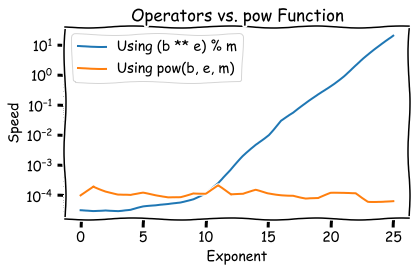

In [6]:
with plt.xkcd():
    fig, ax = plt.subplots()

    line1, = ax.semilogy(X, results_by_ast, label="Using (b ** e) % m")
    line2, = ax.semilogy(X, results_by_func, label="Using pow(b, e, m)")
    ax.set(xlabel="Exponent", ylabel="Speed",
       title="Operators vs. pow Function")
    ax.legend()
    ax.grid()
    plt.tight_layout()
    plt.savefig("op_vs_func.png", format="png", dpi=600)